In [57]:
import pandas as pd

In [58]:
df=pd.read_csv(r'C:\Users\user\Downloads\ARIMA-And-Seasonal-ARIMA-master\perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [59]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [60]:
df.columns=['Month','sales']
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [61]:
df.drop([105,106],axis=0,inplace=True)

In [62]:
df.tail()

,Month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [63]:
df['Month']=pd.to_datetime(df['Month'])

In [64]:
df.head()

,Month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [65]:
df.set_index('Month').head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [66]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:>

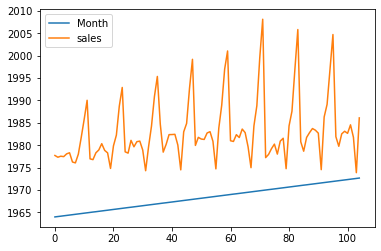

In [67]:
import matplotlib.pyplot as plt
df.plot()

In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
test_result=adfuller(df['sales'])

In [70]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [71]:
adfuller_test(df['sales'])

ADF Test Statistic : -1.8335930563276246
p-value : 0.3639157716602442
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [72]:
df['sales_first_diffrence']=df['sales']-df['sales'].shift(12)
df.head()

,Month,sales,sales_first_diffrence
0,1964-01-01,2815.0,NaN
1,1964-02-01,2672.0,NaN
2,1964-03-01,2755.0,NaN
3,1964-04-01,2721.0,NaN
4,1964-05-01,2946.0,NaN


In [73]:
df=df.dropna()

In [74]:
adfuller_test(df['sales_first_diffrence'])

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

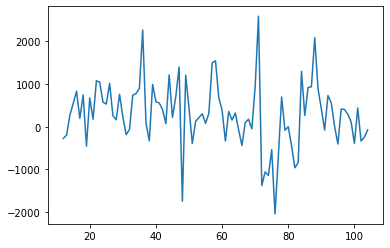

In [75]:
df['sales_first_diffrence'].plot()

In [76]:
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

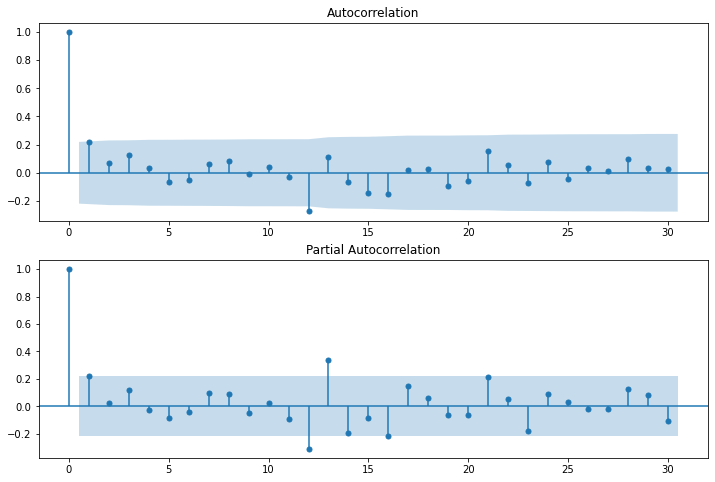

In [77]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sales_first_diffrence'].iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sales_first_diffrence'].iloc[13:],lags=30,ax=ax2)

In [78]:
from statsmodels.tsa.arima_model import ARIMA
import warnings 
warnings.filterwarnings('ignore')

In [79]:
model=ARIMA(df['sales_first_diffrence'],order=[1,1,1])
model=model.fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.sales_first_diffrence   No. Observations:                   92
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -739.804
Method:                            css-mle   S.D. of innovations            735.091
Date:                     Fri, 30 Jul 2021   AIC                           1487.607
Time:                             17:00:09   BIC                           1497.695
Sample:                                  1   HQIC                          1491.679
                                                                                   
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -4.8758      3.531     -1.381      0.167     -11.796       2.044
ar.L1.D.sales_first_diffrence     0.2021      0.103      1.958      0.050      -0.000       0.405
ma.L1.D.sales_first_diffrence    -1.0000      0.033    -30.266      0.000      -1.065      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.9473           +0.0000j            4.9473            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

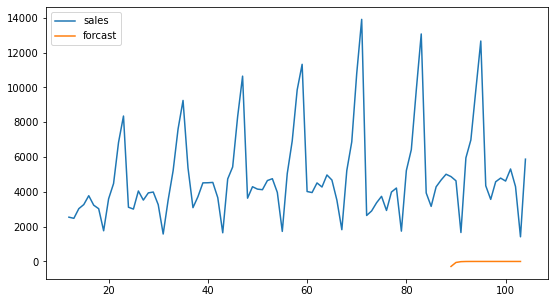

In [81]:
df['forcast']=model.predict(start=90,end=104,dynamic=True)
df[['sales','forcast']].plot(figsize=(9,5))

In [82]:
df.head()

,Month,sales,sales_first_diffrence,forcast
12,1965-01-01,2541.0,-274.0,NaN
13,1965-02-01,2475.0,-197.0,NaN
14,1965-03-01,3031.0,276.0,NaN
15,1965-04-01,3266.0,545.0,NaN
16,1965-05-01,3776.0,830.0,NaN


In [83]:
import statsmodels.api as sm

In [84]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:>

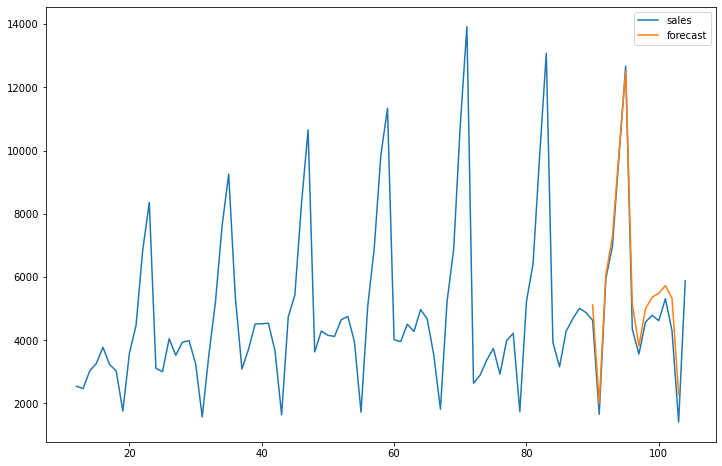

In [85]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [86]:
df.head()

,Month,sales,sales_first_diffrence,forcast,forecast
12,1965-01-01,2541.0,-274.0,NaN,NaN
13,1965-02-01,2475.0,-197.0,NaN,NaN
14,1965-03-01,3031.0,276.0,NaN,NaN
15,1965-04-01,3266.0,545.0,NaN,NaN
16,1965-05-01,3776.0,830.0,NaN,NaN


In [87]:
df.tail()

,Month,sales,sales_first_diffrence,forcast,forecast
100,1972-05-01,4618.0,-392.0,-4.875759,5488.784557
101,1972-06-01,5312.0,438.0,-4.875754,5728.151689
102,1972-07-01,4298.0,-335.0,-4.875753,5326.842435
103,1972-08-01,1413.0,-246.0,-4.875753,2283.447809
104,1972-09-01,5877.0,-74.0,NaN,NaN
